In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erf
import matplotlib.mlab as mlab
import scipy.integrate as integrate

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [28]:
def null(size):
    rv = np.random.normal(size=size )
    return(rv)

def alt(mu,epsilon):
    rv = np.random.normal(scale=1.0)
    if np.random.uniform() < epsilon:
        rv += mu
    return(rv)

def p_from_z(array):
    return(0.5 - 0.5*erf(array/math.sqrt(2)))

def pb(beta):
    if beta <.75:
        return beta - 0.5
    else:
        return((1-math.sqrt(1-beta))^2)

In [29]:
n=10**6
beta = 0.6
r = 1.2*pb(beta)+0.1
mu = math.sqrt(2*r*math.log(n))
epsilon = n**(-beta)
print("non null",n*epsilon)
threshold = math.sqrt(2*math.log(math.log(n)))


('non null', 251.18864315095806)


In [27]:
Experiments = 10**3
max_val = np.zeros(Experiments)
for i in range(Experiments):
    values = null(n)
    p_values = p_from_z(values)
    p_values.sort()

    stat = np.zeros(n)
    for i in range(n/2):
        stat[i] = math.sqrt(n)*(((i+1.0)/n - p_values[i] )/(math.sqrt(p_values[i]*(1-p_values[i]))))
    max_val[i] = np.max(stat)
threshold = np.percentile(max_val,95)

('index', 85)
('max val', 3.5867732399750851)
('p of argmax', 5.8554489918427599e-05)
True


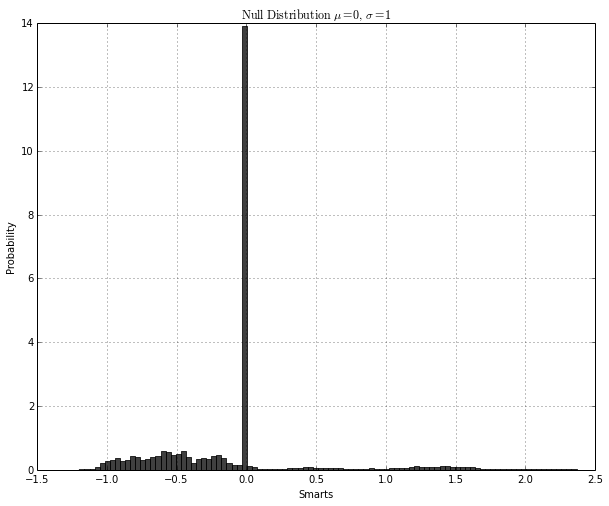

In [26]:

plt.hist(max_val, 100, normed=1, facecolor='black', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Null\ Distribution}\ \mu=0,\ \sigma=1$')
plt.grid(True)

In [15]:


values = alt(n,mu,epsilon)
p_values = p_from_z(values)
p_values.sort()

stat = np.zeros(n)
for i in range(n/2):
    stat[i] = math.sqrt(n)*(((i+0.0)/n - p_values[i] )/(math.sqrt(p_values[i]*(1-p_values[i]))))
argmaxv = np.argmax(stat)
print("index",argmaxv)
maxv = stat[argmaxv]
print("max val",maxv)
pmaxv = p_values[argmaxv]
print("p of argmax",pmaxv)
print(maxv>threshold)

('index', 11)
('max val', 552.94615339782274)
('p of argmax', 3.9572040089197458e-10)
True


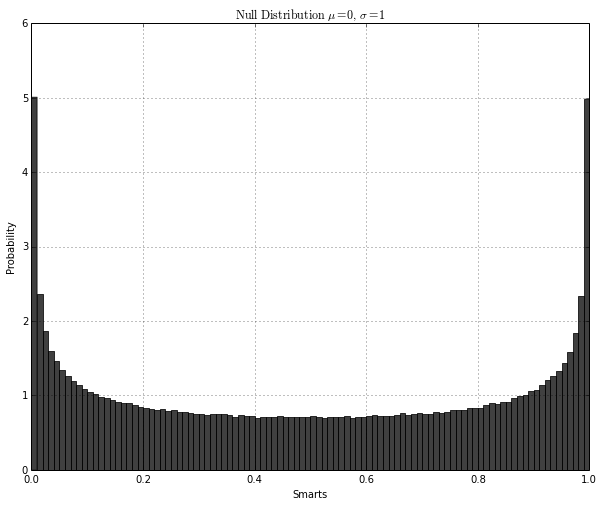

In [16]:
plt.hist(p_values, 100, normed=1, facecolor='black', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Null\ Distribution}\ \mu=0,\ \sigma=1$')
plt.grid(True)
plt.figure()